In [1]:
# Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('marketing_prep.csv', sep=';')

In [3]:
# Cheking correlations
df.corr()

,Age,Education,Marital_Status,Income,Children,Mn_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AllSpends
Age,1.000000,0.184060,0.061275,0.210515,0.094190,-0.028137,0.251330,0.021934,0.113881,0.022685,-0.005171,0.056580,0.174888
Education,0.184060,1.000000,0.008061,0.137803,0.052725,-0.010920,0.242620,-0.157720,0.069210,-0.165157,-0.157736,-0.142820,0.098193
Marital_Status,0.061275,0.008061,1.000000,0.011821,-0.018875,0.012622,0.021141,0.004729,0.027808,0.029660,0.014957,0.019293,0.021332
Income,0.210515,0.137803,0.011821,1.000000,-0.347763,-0.012726,0.825488,0.573810,0.808641,0.554976,0.564534,0.469447,0.829341
Children,0.094190,0.052725,-0.018875,-0.347763,1.000000,-0.026996,-0.279454,-0.458799,-0.466102,-0.475592,-0.451280,-0.306436,-0.432502
Mn_Customer,-0.028137,-0.010920,0.012622,-0.012726,-0.026996,1.000000,0.029987,0.029613,0.046280,0.030954,0.033102,0.033855,0.047932
MntWines,0.251330,0.242620,0.021141,0.825488,-0.279454,0.029987,1.000000,0.501662,0.838639,0.494920,0.489357,0.554922,0.931525
MntFruits,0.021934,-0.157720,0.004729,0.573810,-0.458799,0.029613,0.501662,1.000000,0.712024,0.693381,0.686403,0.551139,0.674147
MntMeatProducts,0.113881,0.069210,0.027808,0.808641,-0.466102,0.046280,0.838639,0.712024,1.000000,0.711685,0.692955,0.619182,0.934309
MntFishProducts,0.022685,-0.165157,0.029660,0.554976,-0.475592,0.030954,0.494920,0.693381,0.711685,1.000000,0.689513,0.540583,0.673042


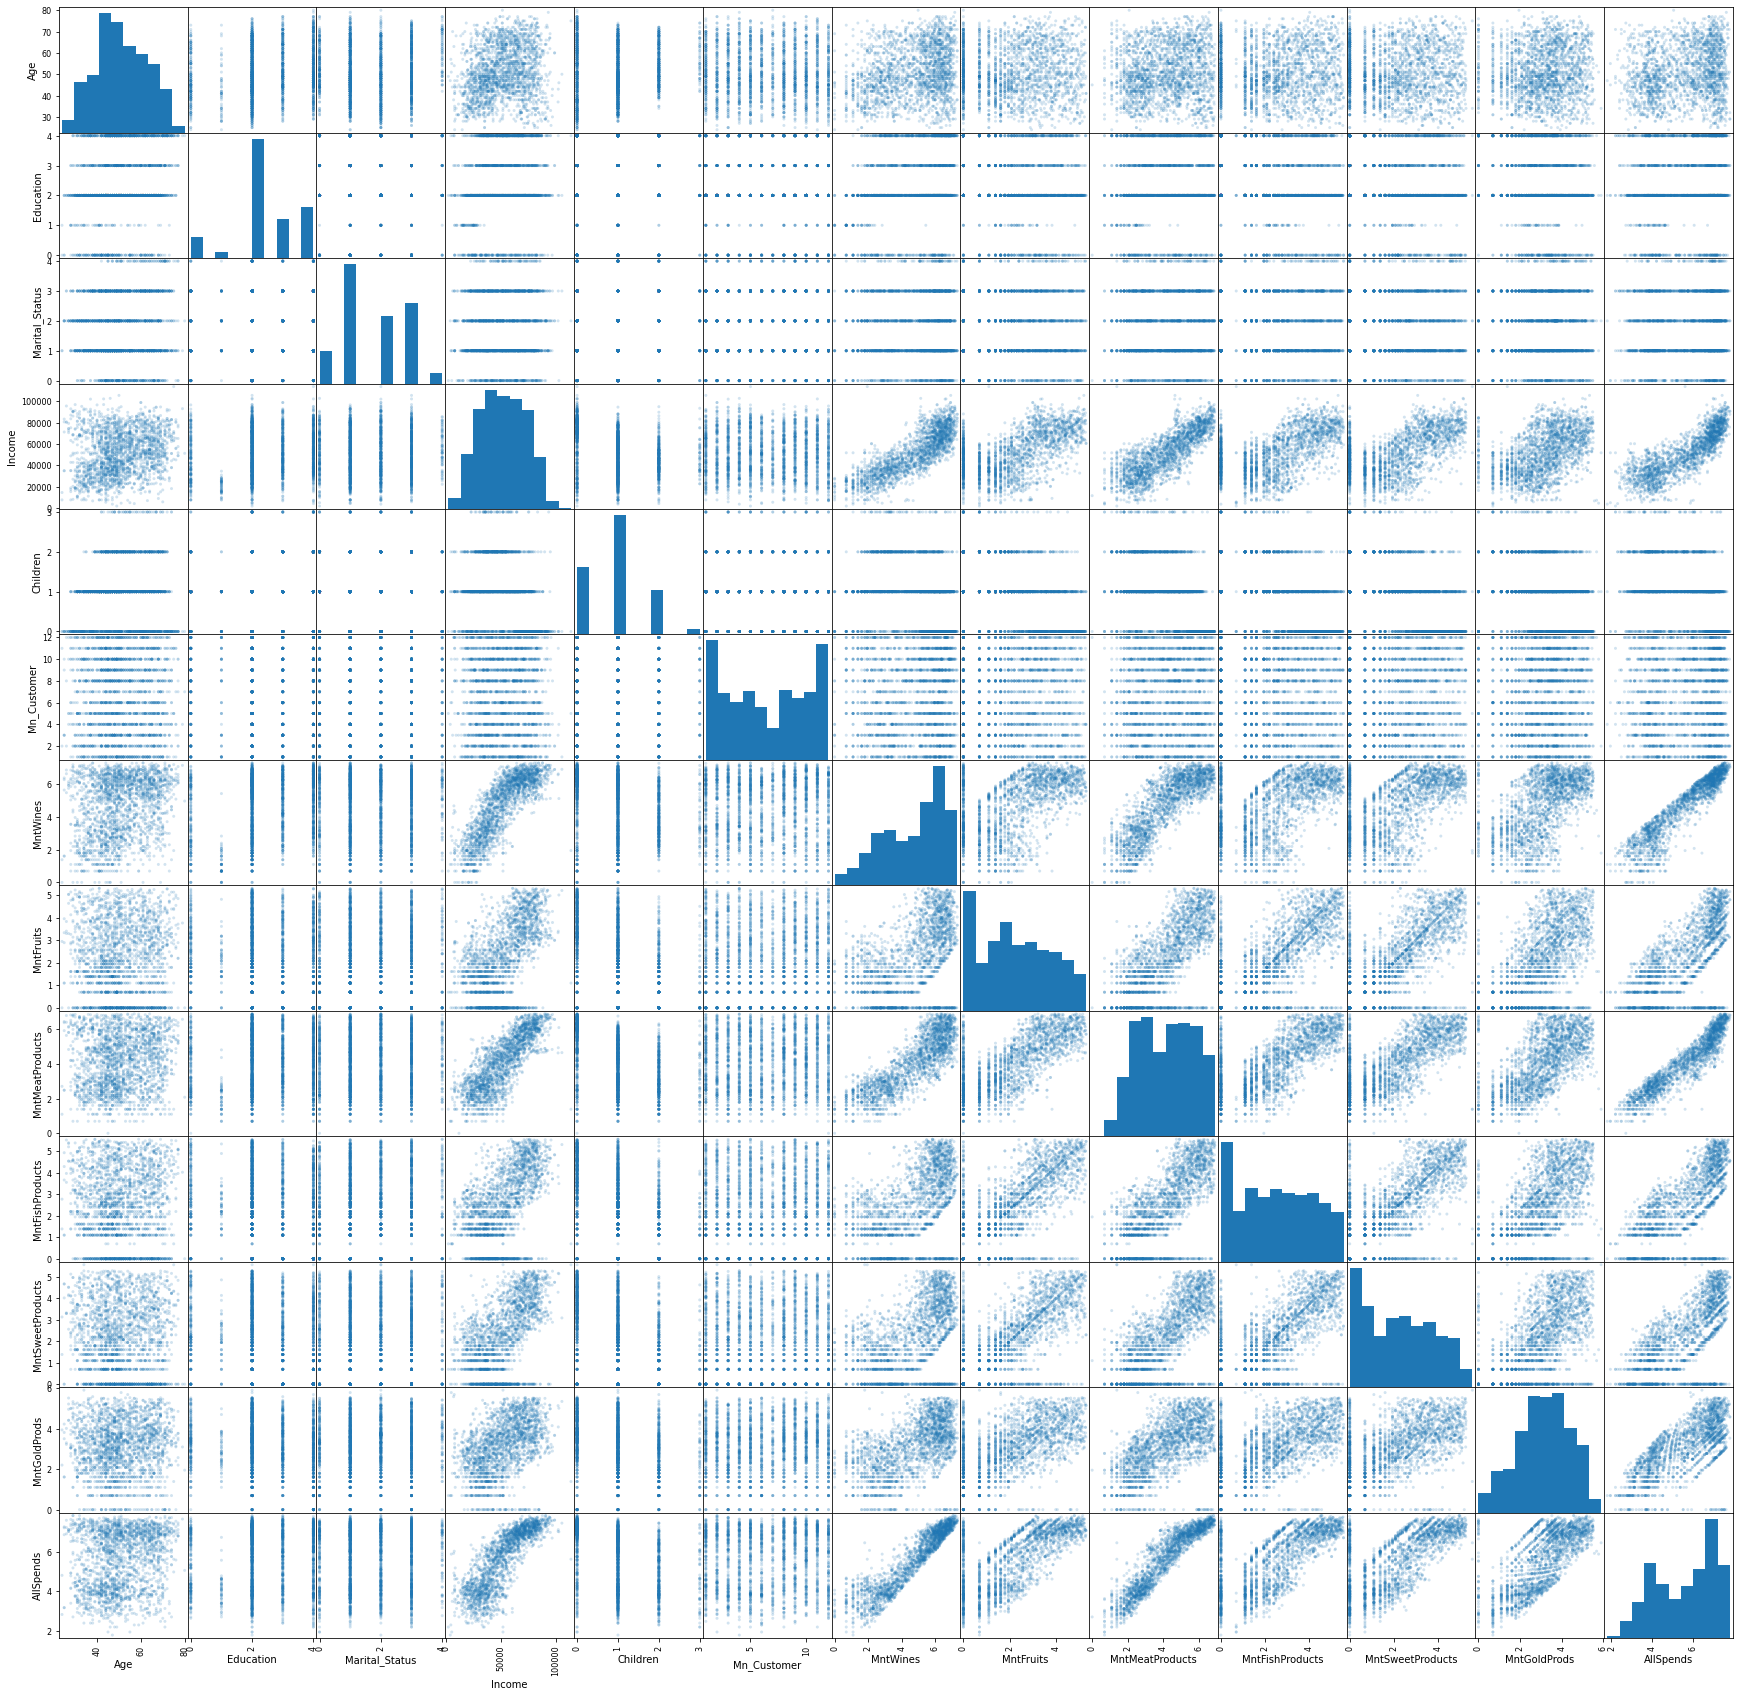

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(30, 30))
plt.show()

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-7].values
y = df.iloc[:, 12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# Fitting Simple Linear Regression to the Training set (Income)
# З кореляційної матриці видно, що найбільний вплив на витрати має дохід. Коефіцієнт кореляції між цими двома змінними 0,818. Саме тому в однофакторійній лінійній регресії в якості незалежної змінної будемо використовувати саме дохід 
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 3:4], y_train)

In [7]:
# Getting parameters
sr.coef_, sr.intercept_
# Рівняння регресії має вигляд: y =0.000059+2.556*x
# де y - lg(витрати покупця на продукцію магазину за останні 2 роки + 1), а х - середньорічний дохід покупців

(array([5.92878402e-05]), 2.5559258133401506)

In [8]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 3:4])

In [9]:
# Coefficient of determination R^2
sr.score(X_train[:, 3:4], y_train), sr.score(X_test[:, 3:4], y_test)
# Коефіцієнт детермінації не є досить високим. На навчаючій вибірці коефіцієнт детермінації нижче 0,7. А от на тестовій він є трохи вищим і скаладає 0,7.

(0.6836026248204349, 0.7034310404136777)

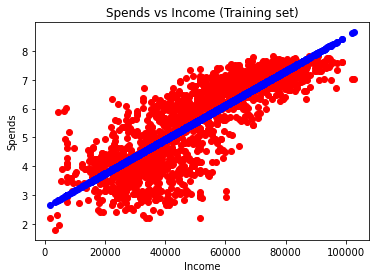

In [10]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sr.predict(X_train[:, 3:4]), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

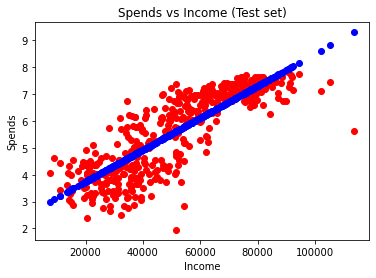

In [11]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sr.predict(X_test[:, 3:4]), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [13]:
# Getting parameters
mr.coef_, mr.intercept_
# Рівняння мнодинної лінійної регресії має наступний вигляд:
# y=0.0047*x1-0.0061*x2+0.0079*x3+0.00005*x4-0.348*x5+0.0238*x6+2.7531

(array([ 4.66578518e-03, -6.05601729e-03,  7.86862215e-03,  5.43780894e-05,
        -3.48048731e-01,  2.38101107e-02]),
 2.7531381447326977)

In [14]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [15]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)
# Як бачимо, для множинної лінійної регресії коефіцієнт детермінації стали вищими. На тестовій і тренувальній вибірках коефіцієнт детермінації є практично однаковий
# Вцілому модель можна вважати задовільною, оскільки коефіцієнти детермінації в обох випадках є більшим за 0.7

(0.7150915848711985, 0.7150069739528971)

In [16]:
# p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues
mr1.summary()
# З отриманих данних, видно, що найбільший вплив на результуючу змінну чинять вік, дохід, кількість дітей, місяць здійснення першої покупки і вільний член. З 5% часткою ймовірності вони є статистично значимими

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     745.0
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:15:05   Log-Likelihood:                -2090.0
No. Observations:                1788   AIC:                             4194.
Df Residuals:                    1781   BIC:                             4232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7531      0.105     26.177      0.000       2.547       2.959
x1             0.0047      0.002      2.806      0.005       0.001       0.008
x2            -0.0061      0.017     -0.362      0.718      -0.039       0.027
x3             0.0079      0.017      0.452      0.651      -0.026       0.042
x4          5.438e-05   1.01e-06     53.630      0.000    5.24e-05    5.64e-05
x5            -0.3480      0.027    -12.987      0.000      -0.401      -0.295
x6             0.0238      0.005      4.480      0.000       0.013       0.034
==============================================================================
Omnibus:                       59.666   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.407
Skew:                          -0.412   Prob(JB):                     1.40e-15
Kurtosis:                       3.490   Cond. No.                     3.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

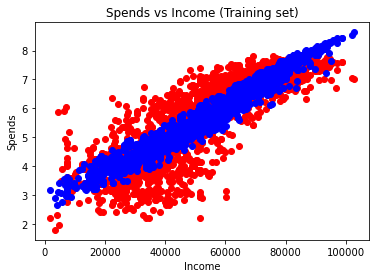

In [17]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], mr.predict(X_train), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

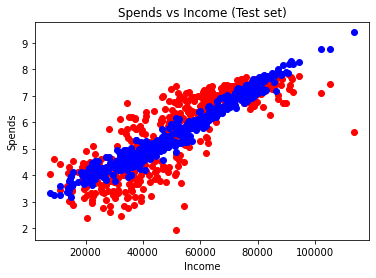

In [18]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], mr.predict(X_test), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

In [19]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 3:4])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 3:4])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [20]:
# Getting parameters
pr.coef_, pr.intercept_
# Поліноміальна модель залежності витрат від доходу має наступний вигляд:
# y = 0.000063*х - 3.17902781e-11*х^2 - 2.485

(array([ 6.25597470e-05, -3.17902781e-11]), 2.4848988205780094)

In [21]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [22]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)
# Дана модель має приблизно такі ж самі значення як і звичайна лінійна моедль
# Коефіцієнт на тестовій вибірці трохи більший 0.7, але є нижчим в порівнянні з множинною лінійною регресією

(0.6836996672452016, 0.7050485170154535)

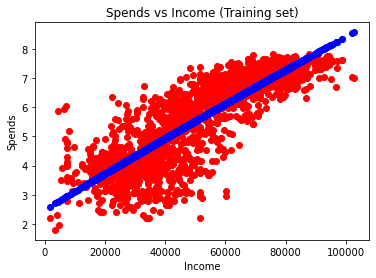

In [23]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

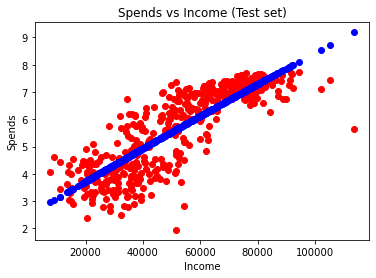

In [24]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

In [25]:
# З уіх розглянутих моделей найкраще себе продемонструвала мнодинна лінійна регресія. Розглянемо саме її для прогнозування.
# Для початку в моделі залишимо лише статистично значимі фактори
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4, 5]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [26]:
X_Modeled
# В якості незалежних змінних можна залишити всі

array([[4.9000e+01, 2.0000e+00, 3.0000e+00, 6.9930e+04, 0.0000e+00,
        5.0000e+00],
       [4.0000e+01, 2.0000e+00, 1.0000e+00, 1.9107e+04, 1.0000e+00,
        8.0000e+00],
       [6.3000e+01, 3.0000e+00, 3.0000e+00, 6.6636e+04, 0.0000e+00,
        8.0000e+00],
       ...,
       [4.1000e+01, 2.0000e+00, 1.0000e+00, 5.6775e+04, 1.0000e+00,
        1.0000e+00],
       [6.2000e+01, 4.0000e+00, 2.0000e+00, 7.9761e+04, 1.0000e+00,
        1.0000e+01],
       [5.6000e+01, 4.0000e+00, 1.0000e+00, 6.5526e+04, 1.0000e+00,
        4.0000e+00]])

In [ ]:
# Отже, на даний момент найкращою є модель множинної лінійної регресії, що має вигляд
# y=0.0047*x1-0.0061*x2+0.0079*x3+0.00005*x4-0.348*x5+0.0238*x6+2.7531